### Funktionale Programmierung
### Angewandte Systemwissenschaften I
#### Python - Wonderland
Einheit 4 / 10

# Semesterplan

0. Anaconda und Pip
1. Einführung in Python
2. Matplotlib: Eine Einführung ins Wonderland - Modell
3. Jupyter-Notebooks: Wonderland in Python
4. **Funktionale Programmierung & Python-Module**
5. Python-Pakete und Workflow
6. Agenten-basierte Modellierung
7. Objekt-orientierte Programmierung 
8. Animationen zur Modellentwicklung
9. Multiprocessing & Sensitivity Analysis
10. Projektpräsentationen

## Inhalt

+ Programmierparadigmen
+ Prozedurale Programmierung
+ Funktionale Programmierung
+ Python als funktionale Programmiersprache
+ Vom Jupyter Notebook zum Python-Modul
+ Mehr funktionale Programmierung in Python

# *** Programmierung - Was heißt das?

Es gibt verschiedene **Paradigmen** zur Programmierung. Es sind verschiedene Varianten die Lösung eines Problems zu beschreiben. Viele Programmiersprachen setzen auf **imperative** Paradigmen. Man gibt dem Computer also **Befehle** die dieser hintereinander ausführt (auch: *Prozedureale Programmierung*).

Die Namen dieser Paradigmen beschreiben meist den **Gedankengang** beim Programmieren.

# Was bisher geschah: Prozedureale Programmierung

Bei der **prozedurealen** Programmierung denkt man also in **Prozederen** (Abfolgen).

Da man hier nur einige **Programmiergrundlagen** benötigt, lernt man Python oft so kennen.

~~~python
# Sortiere 100 Fibonacci zahlen in gerade und ungerade
LOOPS = 98
fibs = [0,1]
# Erzeuge Fibonacci Reihe
for _ in range(LOOPS):
    fibs.append(fibs[-1] + fibs[-2])
# Sortiere in gerade und ungerade
fibs_odd  = list()
fibs_even = list()
for fib in fibs:
    if fib % 2:
        fibs_odd.append(fib)
    else:
        fibs_even.append(fib)
~~~

Man **denkt** also Befehl für Befehl und führt diese **der Reihe nach** aus. Im Jupyter Notebook lassen sich diese Befehlsreihen in **Segmente** unterteilen.

## Globaler Zustand

Als globalen Zustand bezeichnet man **mutable Variablen** welche sich im **globalen Namespace** befinden. Auf die also **alle Teile** des Quellcodes **Zugriff** haben.

Dadurch entstehen einige Probleme:

+ Ergebnisse sind von der **Abfolge** der Abschnitte abhängig
+ Fehler sind **schwer Auswertbar**
+ Code **lässt sich nicht gut testen**
+ Der Zustand des Programms wird zunehmen **unvorhersehbar**

In [1]:
# Globaler Zustand
speicher = [0]

In [2]:
def a():
    x = speicher.pop()
    speicher.append(x+1)
    return x
    
def b():
    x = speicher.pop()
    speicher.append(x+2)
    return x
    
b()

0

## Funktionale Programmierung

Ein **Lösungsansatz** für das Problem mit **globalem Zustand** werden wir in der siebten Einheit kennenlernen: 

**Objekt-orientierte** Programmierung erlaubt es, den **Zustand in Objekten zu bündeln** und so **nicht mehr global** zugänglich zu machen und besser zu **organisieren**.

**Funktionale Programmierung** erlaubt gar keinen variablen Zustand. <br>
Programme werden nicht mehr als **Ausführung von Befehlen** betrachtet, sondern **als mathematische Funktionen** beschrieben, die gelöst werden wollen.

## Geschichte der funktionalen Programmierung

Bereits eine der **ersten Programmiersprachen** überhaupt, der [Lambda - Kalkül](https://de.wikipedia.org/wiki/Lambda-Kalk%C3%BCl) von Alonso Church, war rein funktional!

Dessen Ideen flossen später in der **bis heute angewandt**en Sprache ```LISP``` (kurz für: *List Processing*) ein.

Später wurde von der Firma Ericsson eine Programmiersprache gesucht, mit welcher man die vielen Prozesse welche in einem **Telekommunikations-Server** gleichzeitig ablaufen praktisch implementieren konnte. Dies ging nur mit funktionaler Programmierung und mit ```Erlang``` erschufen sie schließlich eine eigene.

In etwa zur gleichen Zeit fanden sich einige Professoren zusammen und beschlossen die Sprache ```Haskell``` **als Forschungsgegenstand** zu funktionaler Programmierung zu schaffen.

So wurden viele Konzepte entwickelt, welche sich dann **mit der Zeit auch in klassischeren** Programmiersprachen wiederfanden:
+ Lambda - Ausdrücke
+ List - Comprehensions
+ Lazy - Evaluation
+ Höhere Funktionen
+ und sogar Funktoren, Applikative Funktoren und Monaden

Einige dieser Konzepte haben wir **bereits in Python** wiedergefunden. Im folgenden wollen wir deren **Vorteile erörtern**.

## Referentielle Transparenz

Mathematische Funktionen haben **eine zentrale Eigenschaft** welche für uns wichtig ist:
> Gibt man einer solchen zweimal den **selben Input**, ergibt sie garantiert das **selbe Ergebnis**!

Dies nennt man **Referentielle Transparenz**.

Solche Funktionen können **unmöglich** auf einen variablen Zustand zugreifen! Deshalb erlauben **reine funktionale Programmiersprachen** wie zum Beispiel ```Haskell``` nicht einmal Schleifen sondern **nur Rekursion**. Das ist natürlich unrealistisch in ```Python``` (*siehe Einheit 1*).

## Vorteile funktionaler Prorgammierung

*Was bringt einem diese Einschränkung?*

> "The functional programmer sounds rather like a medievæl monk denying himself the pleasures of life, in the hope that it will make him virtuos"
>
> \- *John Hughes (Why Functional Programming matters)*

## Funktionale Programmierung in Python

In Python haben wir den **Nutzen** von ```lambda```s und List-Comprehensions **schon entdeckt**. 

In [3]:
def f(a,b):
    print(a,b)

type(f), type(lambda a,b: print(a,b)) # lambdas sind anonyme Funktionen, also Funktionen ohne Namen

(function, function)

In [4]:
 # Mit List-Comprehensions gelingt filter und map (auch gleichzeitig)
[x*x if x%5 == 1 else 1 for x in range(10)]

[1, 1, 1, 1, 1, 1, 36, 1, 1, 1]

Zwei weitere Vorteile funktionaler Programmiersprachen können wir noch besser erkunden:
    
**Lazy - Evaluation** und **andere höhere Funktionen**.

### Lazy Evaluation

Unter **verzögerter Berechnung** versteht man den Umstand, dass Funktionen **erst dann berechnet** werden, wenn ihr **Ergebnis tatsächlich gebraucht** wird.

Was zuerst nach einem unnötigen Warten klingt, hat **einige wichtige Vorteile**! So können wir mit Lazy Evaluation **unendlich lange Kollektionen** schaffen. Außerdem müssen wir niemals eine **lange Kollektion** im Speicher aufbewaren, da wir sie **on the fly berechnen** können.

In Python sind Objekte vom Typ ```Generator``` **lazy**. Diese können wir ganz einfach mit einer **Generator Expression** ähnllich einer List - Comprehension erstellen. Statt der eckigen Klammer ```[]``` benutzen wir einfach runde ```()```:

In [5]:
gen = (x*x for x in range(99_999))

Ihren nächsten Wert lassen wir mit ```next``` berechnen:

In [6]:
for q in gen:
    print(q)
    if q > 50:
        break

0
1
4
9
16
25
36
49
64


<div class="alert alert-block alert-info">
<h3>Tipp: Mit dem Unterstrich Zahlen strukturieren</h3>
    
In Python gilt:
<pre><code>>>>10000000 == 10_000_000
True
</pre></code>
Mit ```_``` bleibt die Zahl gleich, ihr Wert ist aber <strong>übersichtlicher</strong> zu erfassen.
</div>

## Nützliche Funktionen

In [7]:
range(19)

range(0, 19)

In [8]:
list(zip([1,2,3],[4,5,6]))

[(1, 4), (2, 5), (3, 6)]

### Generators

Außerdem können wir auch **normale Funktionen** zu Generator-Fabriken **verwandeln**. Alles was wir dazu brauchen ist das **Schlüsselwort** ```yield```:

In [9]:
def quadrate(bis=4):
    for x in range(2,bis+1):
        yield x*x

Rufen wir nun die Funktion ```quadrate``` auf, liefert sie uns einen Generator:

In [10]:
new_gen = quadrate(10)
type(new_gen)

generator

Wenn wir diesen an ```next``` überreichen, wird das **Ergebnis** bei ```yield``` **berechnet**:

In [11]:
#for elem in new_gen:
#    print(elem)
next(new_gen), next(new_gen)   

(4, 9)

### Unendliche Iteratoren

Im Modul ```itertools``` befinden sich **drei Generatoren** welche uns **unendlich** lange mit Werten beliefern können:


In [12]:
import itertools

+ ```count``` : Wie ```range```, nimmt aber nur ```start``` und gegebenenfalls ```step``` entgegen und zählt unendlich lange.

In [13]:
c = itertools.count(1,2); next(c), next(c), next(c), next(c)

(1, 3, 5, 7)

+ ```cycle``` : Wiederholt eine übergebene Kollektion unendlich oft.

In [14]:
c = itertools.cycle("Zack"); next(c), next(c), next(c), next(c), next(c)

('Z', 'a', 'c', 'k', 'Z')

+ ```repeat``` : Wiederholt einen Wert unendlich lange. (Gibt man einen Wert ```n```, endlich lange)

In [15]:
c = itertools.repeat("Zack"); next(c), next(c), next(c)

('Zack', 'Zack', 'Zack')

## Eager Evaluation

Im **Gegensatz** zur *lazy evaluation* spricht man von *eager evaluation*, also **eifriger** Berechnung.

**Achtung**! Unendliche Strukturen sollte man niemals zu einer Liste oder ähnlichen *eifrig* berechneten Kollektionen machen. Dann stürzt der Computer ab. 

## Wonderland-Modul

Mit diesem Wissen wollen wir uns einmal daran machen, unser Wonderland vom **Jupyter-Notebook zu einem Modul** zu transferieren.

### Simulationsergebnisse generieren

Ein **Generator** eignet sich auch gut um unsere Simulationsergebnisse zu generieren.

In [16]:
import wonderland as wl

Wir gestalten diesen Generator ähnlich zur eager evaluierten Funktion ```simulation```:
~~~python
def simulation(jahre=300):
    ergebnis = [(x_0,y_0,z_0,p_0)]
    for jahr in range(1,jahre):
        x, y, z, p = ergebnis[jahr-1]
        x_neu = population(x,y,z)
        y_neu = wirtschaft(y,z)
        z_neu = umwelt(x,y,z,p)
        p_neu = technologie(p)
        ergebnis.append((x_neu, y_neu, z_neu, p_neu))
    return ergebnis
~~~

Die Variante als Generator besitzt ebenfalls eine Schleife, jedoch eignet sich ```while``` besser für **unendliche** Wiederholungen:

In [17]:
def simulation():
    x,y,z,p = wl.x_0, wl.y_0, wl.z_0, wl.p_0
    
    while 1:
        yield x,y,z,p
        
        x_neu = wl.population(x,y,z)
        y_neu = wl.wirtschaft(y,z)
        z_neu = wl.umwelt(x,y,z,p)
        p_neu = wl.technologie(p)
        
        x,y,z,p = x_neu, y_neu, z_neu, p_neu

Das Ergebnis wird nicht in einer Liste gespeichert. Der Generator wartet bei ```yield``` bis wir mit ```next``` das **Ergebnis abrufen** und berechnet dann ein neues.

*Zum Mitdenken:* Warum speichern wir zuerst in ```x_neu``` um dann ```x = x_neu``` zu schreiben?

<div class="alert alert-block alert-info">
<h3>Tipp: Singletons</h3>
<p>   
Das leere Tupel <code>()</code> und der Wert <code>None</code> bilden <strong>Singletons</strong> in Python. 
</p>
<p>
Das heißt, dass von ihnen <strong>immer genau eine Instanz</strong> existiert. Erstellen wir ein neues leeres Tupel, verweist Python auf das bereits existierende Objekt <code>()</code>. 
</p>
<p>
Das bedeutet, dass <code>repeat(())</code> oder <code>repeat(None)</code> in Wirklichkeit <strong>nie</strong> neue Objekte erzeugen müssen. Dies ist äußerst effizient.
    </p>
</div>

Rufen wir die Generator - Funktion auf, übergibt diese uns einen Generator:

In [18]:
g = simulation()

Mit ```next``` rufen wir dann in einer List-Comprehension die ersten 300 Ergebnisse ab:

In [19]:
g = simulation()
ergebnisse = [next(g) for _ in range(300)]
ergebnisse[10:]

[(1.1462569803428788,
  1.2189285731677113,
  0.9999965305533157,
  0.9043820750088043),
 (1.1618485977179982,
  1.243307144629305,
  1.0000013724845833,
  0.8953382542587163),
 (1.177620004134155, 1.26817328752161, 0.9999994667790043, 0.8863848717161291),
 (1.1935721255496465,
  1.293536753271999,
  1.0000002032879935,
  0.8775210229989678),
 (1.2097058470113113,
  1.3194074883374327,
  0.9999999239986784,
  0.8687458127689781),
 (1.2260220105335604,
  1.3457956381041805,
  1.0000000278414725,
  0.8600583546412883),
 (1.2425214129157647,
  1.3727115508662642,
  0.999999990014448,
  0.8514577710948754),
 (1.25920480349727,
  1.4001657818835895,
  1.0000000035033458,
  0.8429431933839266),
 (1.2760728818493743,
  1.4281690975212613,
  0.9999999987987715,
  0.8345137614500874),
 (1.2931262954036626,
  1.4567324794716865,
  1.0000000004021374,
  0.8261686238355865),
 (1.3103656370161747,
  1.4858671290611203,
  0.9999999998686961,
  0.8179069375972307),
 (1.3277914424669526,
  1.515584471

Lassen wir uns die ```ergebnisse``` noch darstellen:

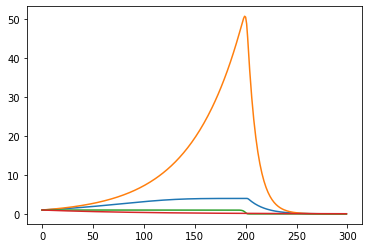

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(ergebnisse)

### Funktionen höherer Ordnung

**Höhere Funktionen** sind solche, welche selbst **Funktionen als  Argumente** übernehmen oder sie als **Ergebnis** zurückgeben.

Einige solche Funktionen sind **bereits in der Standardbibliothek** enthalten:
+ ```map``` : Wendet eine Funktion auf alle Elemente einer Kollektion an.

In [21]:
list(map(lambda x: x*x, range(10)))

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

+ ```filter``` - Filtert die Elemente einer Funktion anhand einer Funktion (genannt Predikat) welche eine ```bool``` ergibt:

In [22]:
list(filter(lambda x: x%5 == 1, range(10)))

[1, 6]

Viele **weitere höhere Funktionen** befinden sich in den Modulen [functools](https://docs.python.org/3/library/functools.html) und [itertools](https://docs.python.org/3/library/itertools.html).<br>
Einige davon werden wir nun bei einer Analyse der Wonderland-Ergebnisse **genauer unter die Lupe nehmen**.

### Weitere Filter - Funktionen

Die Funktion ```filter``` kennen wir nun schon. Zu ihr gesellen sich in ```itertools``` noch weitere, ähnliche Funktionen:

+ ```filerfalse``` : Entfernt alle Elemente für welche die überreichte Funktion ```True``` ergibt.

In [23]:
list( itertools.filterfalse(lambda x: len(x)>1, ['a','ab'])  )

['a']

+ ```dropwhile``` : Entfernt alle Elemente **solange** eine Funktion für diese Elemente ```True``` ergibt:

In [24]:
list( itertools.dropwhile(lambda x: x != 4, range(10))  )

[4, 5, 6, 7, 8, 9]

+ ```takewhile``` : Entfernt alle Elemente **nachdem** eine Funktion für ein Element ```False``` ergibt:

In [25]:
list(  itertools.takewhile(lambda x: x != 4, range(10))  )

[0, 1, 2, 3]

<div class="alert alert-block alert-info">
<h3>Tipp: Kollektionen lazy machen</h3>
    
<code>next</code> funktioniert nicht nur bei verzögerter Auswertung, es lässt sich auf alle Kollektionen anwenden. Dazu muss man aus der Kollektion nur einen <code>Iterator</code> machen. Dazu gibt es die Funktion <code>ìter</code>.
<pre><code>>>>l = list(range(10))
>>>i = iter(l)
>>>next(i)
0
</code></pre>
</div>

## Faltungen

Faltungen wenden eine **Funktion mit zwei Argumenten** auf die Elemente einer Kollektion an. Das kann man sich so vorstellen, dass die **Beistriche** in zB einer Liste, durch einen **Operator ersetzt** werden:

~~~haskell
[ 1 , 2 , 3 , 4 ] <=> 1 : 2 : 3 : 4 : [] => 1 * 2 * 3 * 4 (* 1)
~~~

In Python befindet sich diese Funktion in ```functools``` und heißt ```reduce```.

In [26]:
import functools

```reduce``` kann zum Beispiel Summen oder Faktorielle berechnen und nimmt dazu **drei Argumente** entgegen:
+ ```f``` - Eine Funktion mit zwei Argumenten und einem Rückgabewert
+ ```l``` - Eine Kollektion
+ ```s``` - Den Startwert

Am besten sieht man das an einem **Beispiel**:

In [27]:
functools.reduce(lambda x,y: x*y, range(1,5))

24

In den meisten Nutzungsszenarien kann ```reduce``` durch einfachere Funktionen ersetzt werden:
+ ```sum``` - Berechnet die Summe
+ ```any``` - Setzt ein logisches 'oder' ```or``` zwischen alle Elemente
+ ```all``` - Wie ```any``` nur mit 'und' (```and```)
+ ```math.factorial``` - Berechnet Faktorielle
+ ```str.join``` - Fügt eine Kollektion von Strings zusammen

In [28]:
sum(x*x for x in range(4))

14

### Das Operator - Modul

Funktionen höherer Ordnung verlangen fast immer eine Funktion als Argument. Bisher haben wir dabei meistens von ```lambda``` - Ausdrücken Gebrauch gemacht. Dies ist oft **umständlich** wenn wir doch nur kurze **Ausdrücke in eine Funktion** umwandeln wollen.

Das [Modul ```operator```](https://docs.python.org/3/library/operator.html) bietet hier eine Lösung.

In [29]:
import operator as op

**Operatoren** wie ```+``` für die Addition oder ```*``` für die Multiplikation sind hier als Funktionen hinterlegt. <br>
So verkürzt sich ```lambda x,y: x+y``` zu ```add```.

In [30]:
functools.reduce(op.add,range(19))

171

In [31]:
functools.reduce(op.mul, range(1,10)) # Multiplikation mit 'mul'

362880

Wir überreichen also der Funktion ```reduce``` ein **Funktions - Objekt**, indem wir letztere auf **keine Argumente anwenden**; Das übernimmt ```reduce``` für uns.

#### Weitere Inhalte von Operator

Neben anderen Operatoren, bietet ```operator``` weitere Hilfsmittel um ```lambda``` - Ausdrücke vermeiden zu können.

Es ist zum Beispiel oft nötig das ```i```-te Element einer Kollektion zu entnehmen.
~~~python
lambda kol: kol[i]
~~~
Dies lässt sich durch ```operator.itemgetter``` ersetzen:

In [32]:
letztes_element = op.itemgetter(-1)
letztes_element(range(10))

9

<div class="alert alert-block alert-info">
<h3>Tipp: Operator - Funktionen für Kollektionen</h3>
    <p>
Der Operator <code>+</code> sieht für Kollektionen und Zahlen gleich aus, in <code>operator</code> gibt es aber unterschiedliche Funktionen. Für Zahlen verwendet man <code>add</code>, für Kollektionen <code>concat</code>.
</p>
<p>
Selbiges gilt für <code>*</code> bzw. <code>mul</code>, hier haben wir bereits <code>repeat</code> im Modul <code>itertools</code> kennengelernt.
    </p>
</div>

## Datenanalyse mit Funktionen

Wir wollen nun die **Werte am kritischen Übergang** aus unseren Ergebnissen **herausfiltern**.

Zuerst müssen wir die **Differenzen** zwischen den Umwelt-Zuständen berechnen:

In [33]:
differenzen_umwelt = [b + (b[2]-a[2],) for a,b in zip(ergebnisse, ergebnisse[1:])]

Um nun den **Bereich herauszufiltern** benützen wir ```dropwhile``` und ```takewhile```:

In [34]:
ab_übergang = itertools.dropwhile(
    lambda t: abs(letztes_element(t)) < 0.0269 # Funktion
    , differenzen_umwelt
    )
nur_übergang = itertools.takewhile(
    lambda t: abs(letztes_element(t)) > 0.0001 # Funktion
    , ab_übergang
    )
nur_übergang = list(nur_übergang)

Sehen wir uns das Ergebnis an:

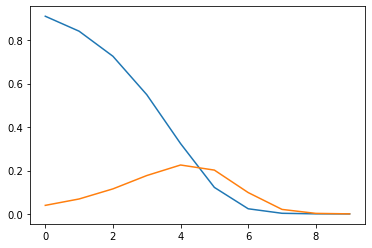

In [35]:
import matplotlib.pyplot as plt
plt.plot([(z,abs(d)) for _,_,z,_,d  in nur_übergang])

*Welche Filterwerte ergeben einen guten Ausschnitt?*

## Currying

Wenn Funktionen **referentiell transparent** sind, dann können wir ihnen auch einen Teil ihrer Argumente schon im Vorhinein geben und den Rest später. Denn ihr **Ergebnis hängt nicht vom Zeitpunkt** der Berechnung **ab**.

Diese Praxis nennt man nach dem Logiker [Haskell Curry](https://de.wikipedia.org/wiki/Haskell_Brooks_Curry) **currying**. Im Modul ```functools``` finden wir die Funktion ```partial``` die uns currying erlaubt: 

In [36]:
plus_5 = functools.partial(op.add,5)

*Was passiert wenn wir die Funktion* ```plus_5``` *auf eine Zahl anwenden?* 

In [37]:
plus_5(19)

24

## Closures

Aber wir können Funktionen auch von vornherein darauf **vorbereiten** ge-curry-t zu werden. **Funktionen höherer Ordnung** können natürlich auch **eigene Funktionen definieren**.

In [38]:
def plus(a):
    
    def inner(b):
        return a+b
    
    return inner

*Was macht die Funktion* ```plus``` *und wie können wir sie nutzen?*

In [39]:
f = plus(5)

Der **große Vorteil** von Closures ist, dass sie in einer **Sprache ohne Konstanten** (*Python*) **referentielle Transparenz** schaffen! Ist ```plus(x)``` einmal ausgeführt, ist ```x``` konstant.

In [40]:
f(4), f(6)

(9, 11)

<div class="alert alert-block alert-info">
<h3>Tipp: Dekoratoren</h3>
    
Wie eingangs erwähnt, sind Dekoratoren nichts anderes als Funktionen, welche eine Funktion als Argument entgegennehmen und wiederum eine als Ergebnis ausgeben. Damit <strong>bilden</strong> sie eine <strong>Closure</strong> mit der ihr überreichten Funktion.

Ein einfacher Dektorator <code>deko</code> welcher die ihm überreichte Funktion nicht beeinfluss, ist bereits eine Closure:
<pre><code>def deko(f):
    def inner(*args,**kwargs):
        return f(*args,**kwargs)
    return inner
</code></pre>
Der Dekorator <code>deko</code> bietet eine praktische Vorlage um Dekoratoren zu entwerfen. Zum Beispiel kann man dann eine Funktion abhängig vom <strong>Typ des Arguments</strong> verschiedene Dinge ausführen lassen. Dies nennt man <strong>Überladen</strong> (<i>overloading</i>) einer Funktion.
<pre><code>def dispatch(f):
    funktionen = [f]
    def reg(f):
            funktionen.append(f)
    def inner(*args,**kwargs):
        for f in funktionen:
            try:
                return f(*args,**kwargs)
            except TypeError:
                pass
    inner.reg = reg
    return inner
</code></pre>
Das funktioniert indem man sie dann mit <code>@dispatch</code> dekoriert und die <strong>alternativen</strong> Funktionen mit <code>@ .. .reg</code> auf ihr <strong>registriert</strong>:
<pre><code>>>>@dispatch
   def plus(x):
       return x+5
>>>@plus.reg
   def plus_str(x):
       return x+"a"
>>>plus("b"), plus(1)
('ba', 6)
</code></pre>

Einen <strong>ähnlichen</strong> Dekorator bietet Python im <code>functools</code> Paket, er heißt dort <code>singledispatch</code>.
</div>

## Grenzen der referentiellen Transparenz in Python

Python ist grundsätzlich **nicht referentiell transparent** gestaltet. Wie wir wissen gibt es in Python keine Konstanten. Außerdem werden Variablen nicht als solche, sondern als Objekt **ID** überreicht und durch ihren Namen aufgerufen.

Verzögerte Evaluierung darf allerdings **nur in referentiell transparenten** Sprachen eingeführt werden. In Python muss man bei ihrer Verwendung einige Fallen beachten.

In [41]:
f = lambda x: x+1
gen = (f(x) for x in itertools.repeat(10))

```f``` ist also eine Funktion welche ihr Argument **inkrementiert**. <br>
```gen``` ist ein Generator welcher ```f``` immer wieder ```10``` als Argument überreicht.

In [42]:
next(gen), next(gen), next(gen), next(gen)  

(11, 11, 11, 11)

Naturgemäß gibt er immer wieder ```11``` aus.

Nun **ändern** wir ```f``` so, dass sie ihr Argument **dekrementiert** und rufen ```gen``` wieder auf:

In [43]:
f = lambda x: x-1
next(gen), next(gen)

(9, 9)

Wir sehen, dass ```gen``` den **Namen** der Funktion ```f``` **referenziert**, nicht deren **ID**. 

Bilden wir eine Generator-Funktion, besitzt diese ihren **eigenen Namespace** und hält ```f``` somit intern **konstant**:

In [44]:
def get_gen(g):
    for x in itertools.repeat(10):
        yield g(x)

Die Generator-Funktion muss aber **zuerst aufgerufen** werden und **überreicht** uns dann den Generator:

In [45]:
gen = get_gen(f)

In [46]:
next(gen)

9

Wir ändern wiederum ```f``` zur inkrementierenden Version:

In [47]:
f = lambda x: x+1

In [48]:
next(gen)

9

<div class="alert alert-block alert-info">
<h3>Tipp: Funktoren und Monaden</h3>
    
Für alle, denen die eingangs erwähnten <strong>(Applikativen) Funktoren</strong> und auch die <strong>Monaden</strong> nicht aus dem Kopf gehen.

<ul>
    <li> Funktoren sind alle <strong>Typen</strong> auf die wir <code>map</code> anwenden können. (Deshalb auf oft <code>fmap</code> genannt)</li>
 

<li> Applikative Funktoren bieten uns eine Funktion <code>pure</code> und einen Operator <code>&lt;*&gt;</code></li>
<ul>
<li> <code>pure</code> garantiert uns dass ein Wert rein (<i>pure</i>) funktional ist.</li>
<li> <code>&lt;*&gt;</code> nimmt eine <i>reine</i> Funktion $f$ mit einer Eingangsvariablen und ein <i>rein</i> funktionales Argument $a$. Danach garantiert <code>&lt;*&gt;</code>, dass auch das Ergebnis von $f(a)$ rein funktional ist.
    <br><br>Alle applikativen Funktoren sind <strong>automatisch Funktoren</strong> denn es gilt: <code>map(f,xs) == pure(f) &lt;*&gt; xs</code>
 </li>
    </ul>
<li>Monaden bieten auch genau zwei Funktionen: <code>return</code> und <code>bind</code></li>
  <ul>
    <li> <code>return</code> ist nicht das <code>return</code> welches wir aus Python kennen, sondern nimmt einen Wert und <strong>weißt ihn der Monade zu</strong>.</li>
    <li> <code>bind</code> nimmt einen Wert in der Monade und eine Funktion. Dann entnimmt sie den Wert aus der Monade und die Funktion gibt mit diesem Wert einen neuen <strong>in der Monade</strong> zurück. Dies ist das Ergebnis von <code>bind</code>.
    <br><br>
    Alle Monaden sind applikative Funktoren, denn es gilt: <br>
    <code>pure(f) &lt;*&gt; xs == bind(return f,lambda x1: bind(xs,lambda x2: return x1(x2)))</code></li>
    </ul>
    </ul>
</div>

## Andere Comprehensions

Es gibt nicht nur **List**-Comprehensions, sondern auch solche für andere Kollektionen:

In [49]:
{x*x for x in range(10) if x > 5} # Set - Comprehension

{x:str(x) for x in range(10) if x != 5} # Dict - Comprehension

tuple(x for x in range(10) if x > 5) # Tuple - Comprehension

(6, 7, 8, 9)

Buch Empfehlung zum Thema FP in Python: Functional Programming in Python - David Mertz